In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_style('darkgrid')

In [51]:
data_dir = Path('../data/ml-100k')


ratings = pd.read_csv(data_dir / 'u.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'timestamp'])
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16


In [36]:
movies = pd.read_csv(data_dir/'u.item', sep='|', encoding='latin-1', names=['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 
    'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 
    'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 
    'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])

movies.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [37]:
users = pd.read_csv(data_dir/'u.user', sep='|', names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [38]:
merged_data = pd.merge(pd.merge(ratings, users, on='user_id'), movies, on='movie_id')
merged_data.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip_code,movie_title,release_date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,1997-12-04 15:55:49,49,M,writer,55105,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),01-Jan-1997,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,1997-11-07 07:18:36,25,M,writer,40206,Heavyweights (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,1997-11-27 05:02:03,28,M,technician,80525,Legends of the Fall (1994),01-Jan-1994,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,1998-02-02 05:33:16,47,M,educator,55113,Jackie Brown (1997),01-Jan-1997,...,0,0,0,0,0,0,0,0,0,0


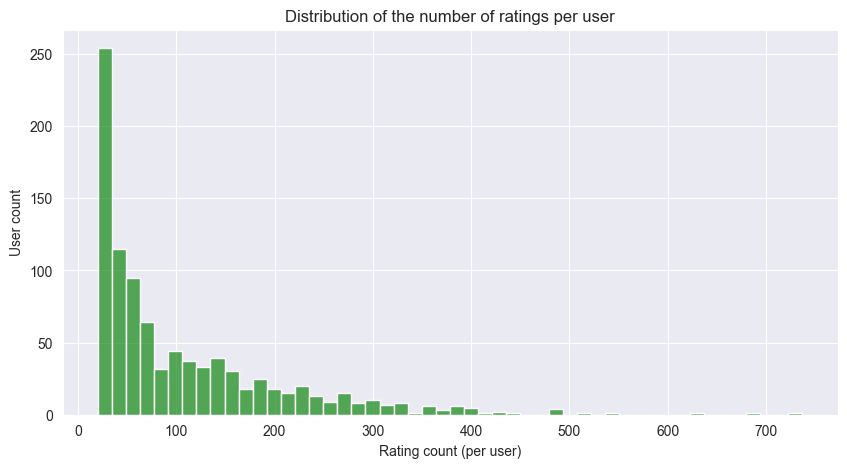

In [39]:
user_activity = ratings['user_id'].value_counts()
plt.figure(figsize=(10, 5))
sns.histplot(user_activity, bins=50, color='green', alpha=0.65)

plt.xlabel('Rating count (per user)')
plt.ylabel('User count')
plt.title('Distribution of the number of ratings per user')

plt.show()


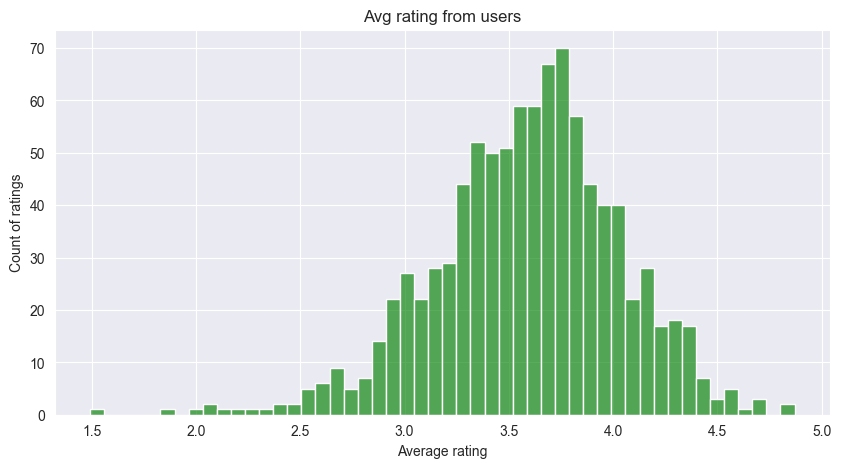

In [40]:
user_mean_rating = ratings.groupby('user_id')['rating'].mean()

plt.figure(figsize=(10, 5))
sns.histplot(user_mean_rating, bins=50, color='green', alpha=0.65)

plt.xlabel('Average rating')
plt.ylabel('Count of ratings')
plt.title('Avg rating from users')

plt.show()

In [41]:
# Let see top 10 most popular popular films
movie_popularity = ratings.groupby('movie_id')['rating'].count().reset_index()
movie_popularity.columns = ['movie_id', 'rating_count']

popular_movies = pd.merge(movie_popularity, movies[['movie_id', 'movie_title']], on='movie_id')
popular_movies = popular_movies.sort_values(by='rating_count', ascending=False)

top_10 = popular_movies[['movie_title', 'rating_count']].head(10)
top_10

,movie_title,rating_count
49,Star Wars (1977),583
257,Contact (1997),509
99,Fargo (1996),508
180,Return of the Jedi (1983),507
293,Liar Liar (1997),485
285,"English Patient, The (1996)",481
287,Scream (1996),478
0,Toy Story (1995),452
299,Air Force One (1997),431
120,Independence Day (ID4) (1996),429


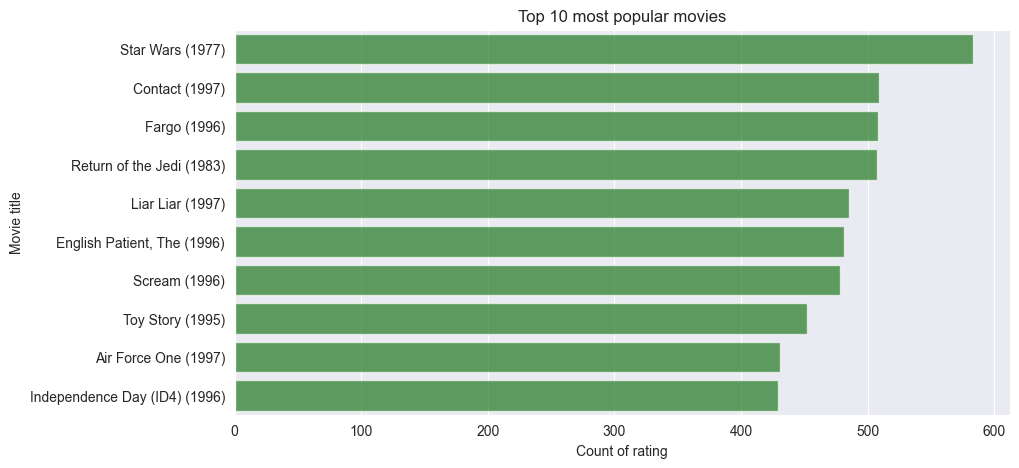

In [42]:
plt.figure(figsize=(10, 5))
sns.barplot(top_10, x='rating_count', y='movie_title', color='green', alpha=0.65)

plt.xlabel('Count of rating')
plt.ylabel('Movie title')
plt.title('Top 10 most popular movies')

plt.show()

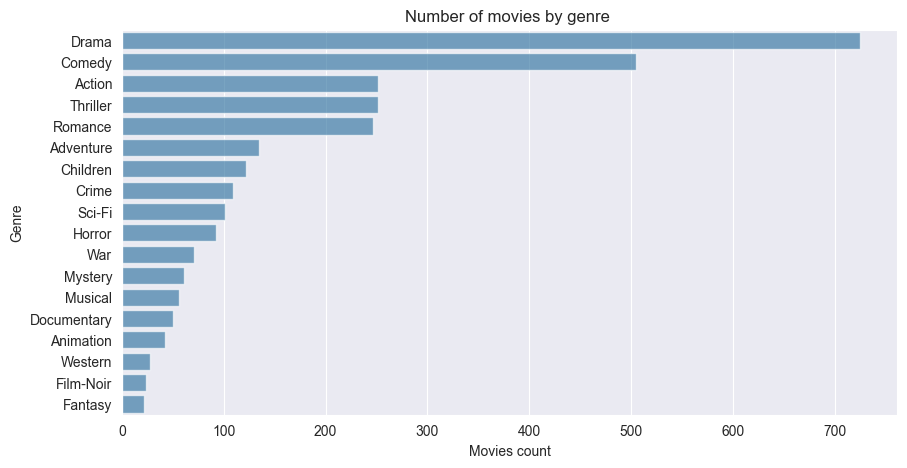

In [43]:
genre_columns = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 
                 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 
                 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

genre_popularity = movies[genre_columns].sum().sort_values(ascending=False)

genre_popularity_df = genre_popularity.reset_index()
genre_popularity_df.columns = ['genre','count']
genre_popularity_df

plt.figure(figsize=(10, 5))
sns.barplot(genre_popularity_df, x='count', y='genre', alpha=0.65)
plt.xlabel('Movies count')
plt.ylabel('Genre')
plt.title('Number of movies by genre ')

plt.show()


In [48]:
# Calculate rating for movies
movie_counts = ratings['movie_id'].value_counts()

#  Choice Top-50 most popular movies
top_movies = movie_counts.head(50).index

filtered_ratings = ratings[ratings['movie_id'].isin(top_movies)]


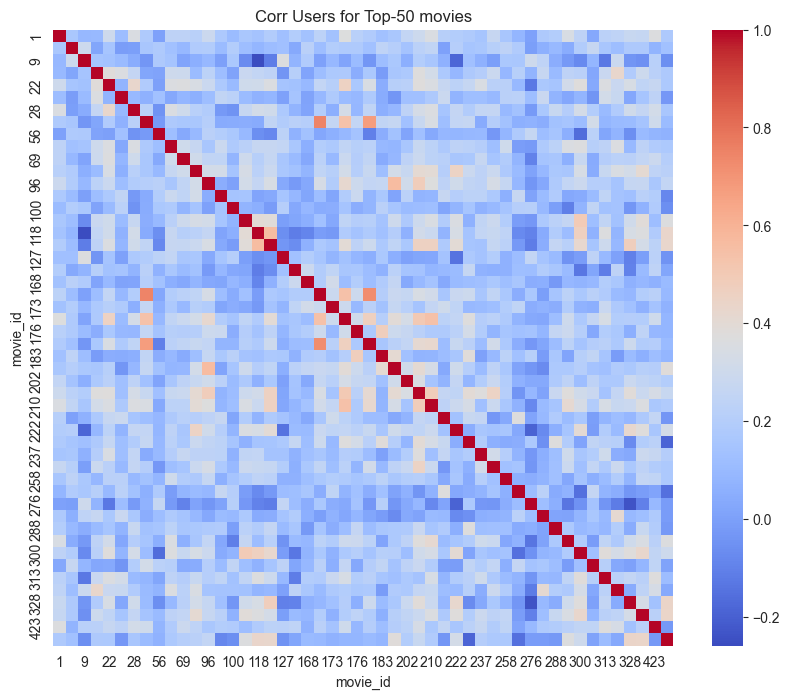

In [50]:
# Build corr matrix
user_movie_ratings_filtered = filtered_ratings.pivot_table(index='user_id', columns='movie_id', values='rating')
user_corr_filtered = user_movie_ratings_filtered.corr(method='pearson', min_periods=15)


plt.figure(figsize=(10, 8))
sns.heatmap(user_corr_filtered, cmap='coolwarm', annot=False)
plt.title('Corr Users for Top-50 movies')
plt.show()

# Also we can display top 10 most similar users with "target" user_id

# user_id = 
# user_corr_with_other = user_corr_filtered[user_id].dropna()
# similar_users = user_corr_with_other.sort_values(ascending=False).head(10)
# similar_users